# degree값에 따른 추세선으로 확인 하는 과적합 문제

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
%matplotlib inline

In [2]:
# random값으로 구성된 x값에 대해 cosine변환값을 반환
def true_fun(x):
    return np.cos(1.5*np.pi*X)

#x는 0부터 1까지 30개의 random 값을 순서대로 sampling한 데이터임
# np.random.seed(0)
n_samples = 30

X = np.sort(np.random.rand(n_samples))
X

array([0.00572906, 0.08183109, 0.0868382 , 0.14109185, 0.14542458,
       0.16688281, 0.19299615, 0.20946275, 0.21644663, 0.23464748,
       0.25616115, 0.39730844, 0.40940082, 0.41661138, 0.49419277,
       0.51120629, 0.5277326 , 0.52851315, 0.54834012, 0.55664683,
       0.57555273, 0.62607828, 0.63453545, 0.64542639, 0.65933115,
       0.74158804, 0.95138138, 0.95303376, 0.95336066, 0.97438195])

In [3]:
#y값은 cosine기반의 true_fun()에서 약간의 noise변동값을 더한 값
y = true_fun(X) + np.random.randn(n_samples)*0.1
y

array([ 1.15194141,  0.89665801,  0.86016564,  0.72517683,  0.71268002,
        0.61677706,  0.40867487,  0.50198457,  0.3601343 ,  0.55368292,
        0.46199202, -0.44527812, -0.43155854, -0.29139724, -0.62272265,
       -0.7159767 , -0.81677025, -0.74806128, -0.63458445, -0.89823321,
       -0.99405125, -1.0981715 , -0.91922547, -1.08077966, -0.9771597 ,
       -0.69429737, -0.23188917, -0.23788539, -0.12609115, -0.04193482])

In [6]:
def true_fun(x):
    return np.cos(1.5*np.pi*X)

# np.random.seed(0)
n_samples = 30

X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples)*0.1

X

array([0.03293681, 0.14048705, 0.14074739, 0.16323002, 0.1877525 ,
       0.20033405, 0.22665555, 0.2364822 , 0.24674097, 0.27038163,
       0.32657451, 0.33737339, 0.35738856, 0.425883  , 0.43027623,
       0.43872561, 0.45491757, 0.53781576, 0.63544444, 0.73497194,
       0.81731405, 0.83083622, 0.85973012, 0.87657254, 0.88321984,
       0.885363  , 0.9610828 , 0.96115201, 0.965031  , 0.98786762])

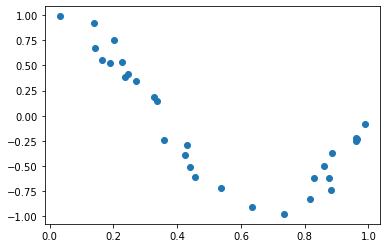

In [7]:
plt.scatter(X, y)

AttributeError: 'LinearRegression' object has no attribute 'coef_'

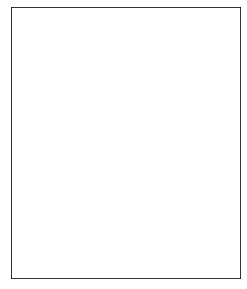

In [15]:
# from math import degrees
# from statistics import linear_regression

# #p. 281

# from cProfile import label

#다행 회귀의 차수(degree)를 변화시키면서 회귀 계수와 MSE값 구해보고 그래프로 나타내기
plt.figure(figsize=(14,5))
degrees = [1, 4, 15]

# 다항 회귀의 차수(degree)를 1, 4, 15로 각각 변화시키면서 비교합니다.
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i+1)
    plt.setp(ax, xticks=(), yticks=())

    # 개별 degree별로 polynomial 변환합니다.
    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features), ("linear_regression", linear_regression)])
    # pipline.fit(X.reshape(-1, 1), y)

    # 교차 검증으로 다항 회귀를 평가합니다.
    scores = cross_val_score(pipeline, X.reshape(-1, 1), y, scoring="neg_mean_squared_error", cv=10)
    coefficients = pipeline.named_steps['linear_regression'].coef_
    # print(coefficients)

    # 0부터 1까지 테스트 데이터 세트를 100개로 나눠 예측을 수행합니다.
    #테스트 데이터 세트에 회귀 예측을 수행하고 예측 곡선과 실제 곡선을 그려서 비교합니다.
    X_test = np.linspace(0, 1, 100)
    pred = pipeline.predict(X_test[:, np.newaxis])
    # print(pred)

    # 예측값 곡선
    plt.plot(X_test, pred, label="Model")

    #실제값 곡선
    plt.plot(X_test, true_fun(X_test), '--', label="True func")
    plt.scatter(X, y, edgecolors='b', s=20, label='Samples')



Degree 1 회귀 계수는 [-2.] 입니다.
Degree 1 MSE는 0.46 입니다.


ValueError: x and y must have same first dimension, but have shapes (100,) and (30,)

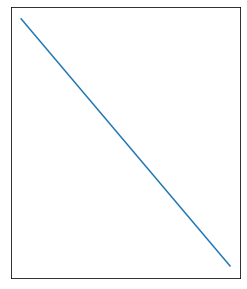

In [4]:
plt.figure(figsize=(14 ,5))
degrees = [1, 4, 15]

for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i+1)
    plt.setp(ax, xticks=(), yticks=())
    
    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    linear_regression = LinearRegression()
    
    pipeline = Pipeline([("polynomial_features", polynomial_features), ("linear_regression", linear_regression)])
    
    pipeline.fit(X.reshape(-1, 1), y)
    
    scores = cross_val_score(pipeline, X.reshape(-1, 1), y, scoring="neg_mean_squared_error", cv=10)
    coefficients = pipeline.named_steps["linear_regression"].coef_
    print("\nDegree {0} 회귀 계수는 {1} 입니다.".format(degrees[i], np.round(coefficients),2))
    print("Degree {0} MSE는 {1:.2f} 입니다.".format(degrees[i], -1*np.mean(scores)))
    
    X_test = np.linspace(0, 1, 100)
    
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    
    plt.plot(X_test, true_fun(X_test), '--', label="True function")
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
    
    plt.xlabel("x"); plt.ylabel("y"); plt.xlim((0, 1)); plt.ylim((-2, 2)); plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e}".format(degrees[i], -scores.mean(), scores.std()))

plt.show()